# 1. Jaccard Similarity of URLS across personas

In [9]:
import pandas as pd

In [10]:
def jaccard(persona1_reclist, persona2_reclist):
    """Implement Jaccard similarity. Assumes there is no punctuation in text."""
    sw1 = set(persona1_reclist) # turn into a set of urls
    sw2 = set(persona2_reclist)
    sim = len(sw1.intersection(sw2)) / len(sw1.union(sw2))
    return round(sim, 4) # round to 4 digits after the comma

def applyJaccard(all_recs):
    """Appl the Jaccard similarity between the recs of all personas"""
    results_df = pd.DataFrame(columns=['Beauty', 'Society', 'Sports', 'control'], index=['Beauty', 'Society', 'Sports', 'control'])
    for persona1 in all_recs.keys():
        for persona2 in all_recs.keys():
            jac = jaccard(all_recs[persona1], all_recs[persona2])
            results_df.at[persona1, persona2] = jac
    

    return results_df

In [11]:
allrecs_df = pd.concat( 
    map(pd.read_csv, ['Beauty_recommended.csv', 'sports_recommended.csv',
                     'fixed_control_society_recommended.csv', 'fixed_society_recommended.csv']), ignore_index=True)

#create a dictionary with all recommended links for each persona type
allrecs_dict = {persona: links['rec_1'].dropna().tolist()+links['rec_2'].dropna().tolist()+links['rec_3'].dropna().tolist()+
             links['rec_4'].dropna().tolist()+links['rec_5'].dropna().tolist()+links['rec_6'].dropna().tolist()+
             links['rec_7'].dropna().tolist()+links['rec_8'].dropna().tolist()
             for persona,links in allrecs_df.groupby("persona")}

In [4]:
jac_results = applyJaccard(allrecs_dict)
jac_results

,Beauty,Society,Sports,control
Beauty,1.0,0.0698,0.0921,0.0983
Society,0.0698,1.0,0.0707,0.0768
Sports,0.0921,0.0707,1.0,0.1549
control,0.0983,0.0768,0.1549,1.0


In [58]:
# Convert results to numeric for heatmap
jac_results_numeric = jac_results.apply(pd.to_numeric, errors='coerce')

jac_results_numeric

,Beauty,Society,Sports,control
Beauty,1.0000,0.0698,0.0921,0.0983
Society,0.0698,1.0000,0.0707,0.0768
Sports,0.0921,0.0707,1.0000,0.1549
control,0.0983,0.0768,0.1549,1.0000


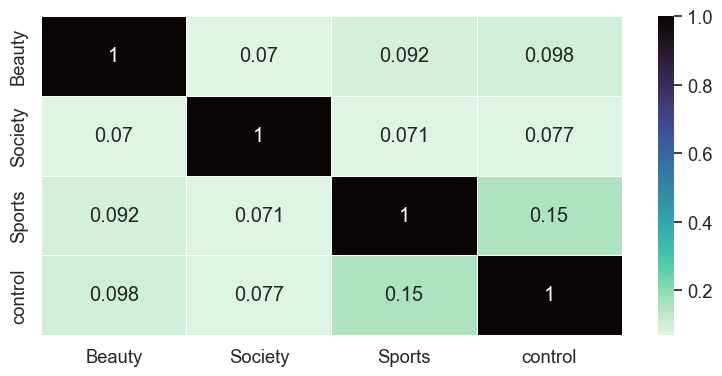

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(jac_results_numeric, 
            cmap='mako_r', # set color map Blue to Green
            annot=True, # show the numerical values in each cell
            linewidths=0.5) # width of lines that separate the cells in the map

plt.tight_layout()
plt.show()

# 2. Jaccard similarity of words across personas

In [26]:
import re

In [61]:
allwords_dict = {'Beauty': [], 'Sports': [], 'Society': [], 'control': []}

pyk_data = pd.read_csv('pyktok_output.csv')

beauty_vids = pd.read_csv('Beauty_recommended.csv')
sports_vids = pd.read_csv('sports_recommended.csv')
society_vids = pd.read_csv('fixed_society_recommended.csv')
control_vids = pd.read_csv('fixed_control_society_recommended.csv')

In [62]:
def get_vidids(link_df):
    """Extracts the video ids for all recommended video"""
    id_list = []
    for index, recs in link_df.loc[:,['rec_1','rec_2','rec_3','rec_4','rec_5', 
                                            'rec_6','rec_7','rec_8']].iterrows():
        for rec in recs:
            try:
                vid_id = re.findall(r'video/(\d+)', rec)[0]
                id_list.append(vid_id)
            except TypeError:
                continue
    return id_list

In [63]:
# Get list of video ids for each persona
beauty_ids = get_vidids(beauty_vids)
sports_ids = get_vidids(sports_vids)
society_ids = get_vidids(society_vids)
control_ids = get_vidids(control_vids)

In [64]:
# Combine video description and suggested words of each video id from Pyktok 
# Append vid_words to corresponding persona in dictionary to be used for Jaccard
for index, row in pyk_data.iterrows():
    vid_words = ''
    if row['video_description'] != None:
        vid_words += str(row['video_description'])
    if row['suggested_words'] != None:
        vid_words += str(row['suggested_words'])
    if vid_words != '':
        if str(row['video_id']) in beauty_ids:
            allwords_dict['Beauty'].append(vid_words)
        if str(row['video_id']) in sports_ids:
            allwords_dict['Sports'].append(vid_words)
        if str(row['video_id']) in society_ids:
            allwords_dict['Society'].append(vid_words)
        if str(row['video_id']) in control_ids:
            allwords_dict['control'].append(vid_words)

In [65]:
#Perform Jaccard similarity analysis on the descriptions and suggested words across personas
jac_results2 = applyJaccard(allwords_dict)

jac_results2_numeric = jac_results2.apply(pd.to_numeric, errors='coerce')

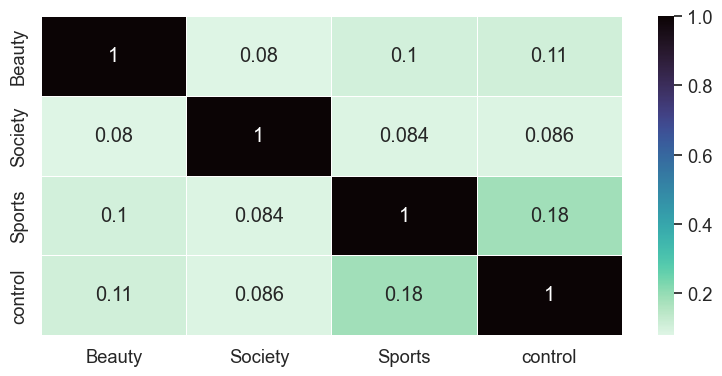

In [66]:
# Create a heatmap
plt.figure(figsize=(8, 4))
sns.set(font_scale=1.2)  # Adjust font size
sns.heatmap(jac_results2_numeric, 
            cmap='mako_r', # set color map Blue to Green
            annot=True, # show the numerical values in each cell
            linewidths=0.5) # width of lines that separate the cells in the map

plt.tight_layout()
plt.show()